In [62]:
from tqdm import tqdm
import easyocr
import os
import cv2
import matplotlib.pyplot as plt

In [66]:
list_path=os.listdir(r"scb")
list_path=["scb/"+i for i in list_path]
list_path

['scb/241829.jpg',
 'scb/328713184_526451809631674_587661103040484646_n.jpg',
 'scb/328788633_737021624619700_7136436083795179439_n.jpg',
 'scb/328789220_586622286687395_8428324264400853464_n.jpg',
 'scb/328853529_1573314806525869_2482575008636716417_n.jpg',
 'scb/328957066_121517870858000_1419853420818729236_n.jpg',
 'scb/332812217_3540970842855383_9030081013701826712_n.jpg',
 'scb/333900563_3416948481953434_6599585905694933179_n.jpg',
 'scb/333943514_1912613435748401_6031411110012322936_n.jpg',
 'scb/333964263_202499569126834_8114178338524467807_n.jpg',
 'scb/333979404_2845680645562971_3779615611478782554_n.jpg',
 'scb/333981965_709188807600612_5450488617004114299_n.jpg',
 'scb/LINE_ALBUM_slip_230227_101.jpg',
 'scb/LINE_ALBUM_slip_230227_104.jpg',
 'scb/LINE_ALBUM_slip_230227_114.jpg',
 'scb/LINE_ALBUM_slip_230227_13_0.jpg',
 'scb/LINE_ALBUM_slip_230227_164.jpg',
 'scb/LINE_ALBUM_slip_230227_168.jpg',
 'scb/LINE_ALBUM_slip_230227_173.jpg',
 'scb/LINE_ALBUM_slip_230227_182.jpg',
 'sc

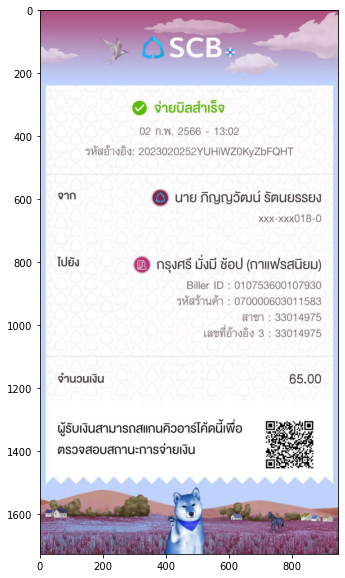

In [67]:
img = cv2.imread(list_path[0])

# Apply Otsu's thresholding to the image
# ret, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the thresholded image using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(img, cmap='gray')

# Show the plot
plt.show()

In [71]:
reader=easyocr.Reader(['en','th'])
img = cv2.imread(list_path[0])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ls = reader.readtext(gray,detail=0,paragraph=False)
ls

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['scb',
 'จ่ายบิลสำเร็จ',
 '02 ก.พ. 2566',
 '13:02',
 ' รหัสอ้างอิง: 2023020252yuhiwzokyzbfoht',
 'จา',
 'นาย ภิญญวัฒน รัตนยรรยง',
 ' xxx-xxx018-0',
 'ไปยัง',
 'กรุงศรีมั่งมี ช้อป(กาแฟรสนิยม)',
 'biller ld',
 '010753600107930',
 ' รหัสร้านค้า',
 '070000603011583',
 'สาขา',
 '33014975',
 ' เลขที่อ้างอิง 3',
 '33014975',
 ' จำนวนเงิน',
 '65.00',
 'ผู้รับเงินสามารถสแกนคิวอาร์โค้ดนี้เพื่อ',
 'ตรวจสอบสถานะการจ่ายเงิน']

True

In [75]:
#Test the bank slip logical
list_path=os.listdir(r"scb")
list_path=["scb/"+i for i in list_path]
list_path

reader = easyocr.Reader(['en','th'])
 # Length of the pattern to match
check_list = []
img_list = []
for i in tqdm(range(0,10)):
    img = cv2.imread(list_path[i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ls = reader.readtext(gray,detail=0,paragraph=False)


    if 'scb' in ls[0].lower() and (sum(1 for w in ls if 'xxx-xxx' in w.lower()) >= 1 or sum(1 for w in ls if 'xxx xxx' in w.lower())) >= 1:
        check_list.append("1")
    else:
        check_list.append("0")
    img_list.append(ls)



CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
100%|██████████| 10/10 [03:42<00:00, 22.26s/it]


In [76]:
# img_list[1]
check_list
# len('012045212258790754')

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1']

In [74]:
#Check with all bank slip
Bank_list = ['baac','bbk','kbank','krungsri','krungthai','memo','scb','ttb']

for i in Bank_list:
    list_path = os.listdir(i)
    list_path = [os.path.join(i, j) for j in list_path]
    reader = easyocr.Reader(['en','th'])

    check_list = []
    img_list = []

    for k in tqdm(range(0,7)):
        img = cv2.imread(list_path[k])
        if img is not None:  # check if image was loaded correctly
            # Convert the image to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            ls = reader.readtext(gray, detail=0, paragraph=False)
            if 'scb' in ls[0].lower() and (sum(1 for w in ls if 'xxx-xxx' in w.lower()) >= 1 or sum(1 for w in ls if 'xxx xxx' in w.lower())) >= 1:
                check_list.append("1")
            else:
                check_list.append("0")
            img_list.append(ls)
        else:
            print(f"Error loading image: {list_path[k]}")
    print(f'check_list_{i}' , check_list)


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
100%|██████████| 7/7 [01:46<00:00, 15.22s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_baac ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [02:19<00:00, 19.93s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_bbk ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [02:00<00:00, 17.19s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_kbank ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [03:21<00:00, 28.77s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_krungsri ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [01:43<00:00, 14.84s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_krungthai ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [04:37<00:00, 39.58s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_memo ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [02:29<00:00, 21.39s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_scb ['1', '1', '1', '1', '1', '1', '1']


100%|██████████| 7/7 [06:09<00:00, 52.84s/it]

check_list_ttb ['0', '0', '0', '0', '0', '0', '0']
